In [1]:
import pandas as pd
import numpy as np

In [2]:
#Carga de datos
df_wdbc = pd.read_csv('data.csv')
df_wdbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#N° de casos malignos y benignos
diagnosis_counts = df_wdbc['diagnosis'].value_counts()
print(diagnosis_counts)

B    357
M    212
Name: diagnosis, dtype: int64


In [4]:
df_wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Eliminacion de valores nulos
df_wdbc.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
df_wdbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Conversion a datos númericos el diagnostico 1: Maligno,  2: Benigno
df_wdbc.diagnosis.replace({"M":1,"B":0},inplace=True)
df_wdbc.diagnosis.unique()
df_wdbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Eliminamos la columna diagnóstico
X = df_wdbc.drop('diagnosis', axis=1)
y = df_wdbc['diagnosis']
# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#PCA con 2 componentes

In [10]:
# Crea una instancia de PCA y especifica el número de componentes deseados
pca = PCA(n_components=1)

# Aplica PCA a los datos estandarizados
X_pca = pca.fit_transform(X_scaled)

In [11]:
# Crea un nuevo DataFrame con las componentes principales y el diagnóstico correspondiente
df_pca = pd.DataFrame(X_pca, columns=['Componente 1'])
df_pca['diagnosis'] = df_wdbc['diagnosis']

In [12]:
# Crea una instancia de PCA y especifica el número de componentes deseados
pca2 = PCA(n_components=2)

# Aplica PCA a los datos estandarizados
X_pca2 = pca2.fit_transform(X_scaled)

In [13]:
# Crea un nuevo DataFrame con las componentes principales y el diagnóstico correspondiente
df_pca2 = pd.DataFrame(X_pca2, columns=['Componente 1', 'Componente 2'])
df_pca2['diagnosis'] = df_wdbc['diagnosis']

In [14]:
#PCA con 3 componentes

In [15]:
# Crea una instancia de PCA y especifica el número de componentes deseados
pca3 = PCA(n_components=3)

# Aplica PCA a los datos estandarizados
X_pca3 = pca3.fit_transform(X_scaled)

In [16]:
# Crea un nuevo DataFrame con las componentes principales y el diagnóstico correspondiente
df_pca3 = pd.DataFrame(X_pca3, columns=['Componente 1', 'Componente 2', 'Componente 3'])
df_pca3['diagnosis'] = df_wdbc['diagnosis']

In [17]:
#Mostrando el grafico de PCA con 2 y 3 componentes

In [18]:
import matplotlib.pyplot as plt

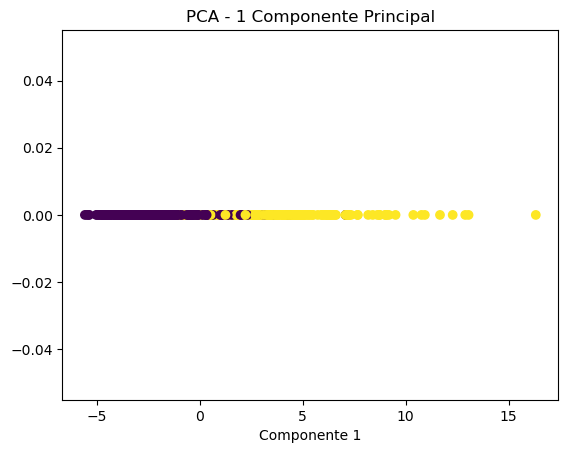

In [19]:
# Se obtiene la primera componente principal
componente1 = df_pca['Componente 1']

# Crea el gráfico de dispersión en 1D
plt.scatter(componente1, np.zeros_like(componente1), c=df_pca['diagnosis'])
plt.xlabel('Componente 1')
plt.title('PCA - 1 Componente Principal')
plt.show()

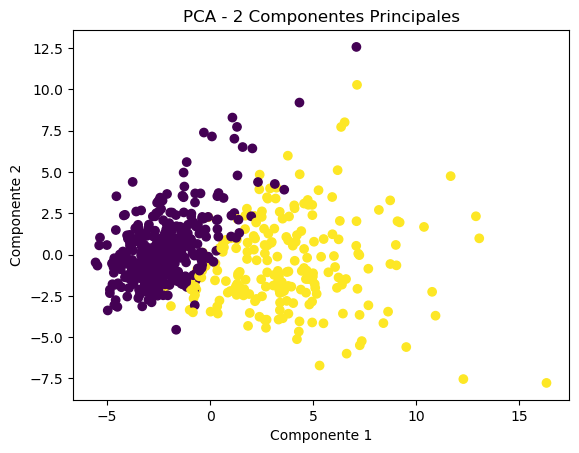

In [20]:
# Se obtiene las dos primeras componentes principales
componente1 = df_pca2['Componente 1']
componente2 = df_pca2['Componente 2']

# Crea el gráfico de dispersión en 2D
plt.scatter(componente1, componente2, c=df_pca2['diagnosis'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA - 2 Componentes Principales')
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

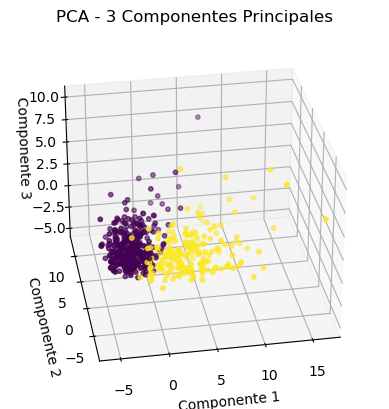

In [22]:
# Se obtiene las tres primeras componentes principales
componente1 = df_pca3['Componente 1']
componente2 = df_pca3['Componente 2']
componente3 = df_pca3['Componente 3']

# Crea el gráfico de dispersión en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(componente1, componente2, componente3, c=df_pca3['diagnosis'], s=10)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('PCA - 3 Componentes Principales')
ax.view_init(elev=30, azim=260)

plt.show()

In [23]:
#Division de la data en entrenamiento y test
#Usamos PCA con 3 componentes pues tiene una mejor separación de clases 
#  y ademas se aplico en el modelo y se obtuo mejores resultados

In [24]:
from sklearn.model_selection import train_test_split

In [37]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca3, df_wdbc['diagnosis'], test_size=0.3, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (398, 3)
Dimensiones del conjunto de prueba: (171, 3)


In [38]:
#Modelos

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [40]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [41]:
# Entrenar y realizar validación cruzada para cada modelo
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    results[model_name] = scores.mean()

In [42]:
# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada:")
for model_name, score in results.items():
    print(model_name + ":", score)

Resultados de validación cruzada:
Random Forest: 0.9321153846153847
SVM: 0.9446153846153846
Logistic Regression: 0.9371794871794872
KNN: 0.9321794871794872
Naive Bayes: 0.9144871794871795
Decision Tree: 0.9095512820512821


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
# Obtener las predicciones para cada modelo en los datos de prueba
predictions = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

In [45]:
# Calcula las métricas de evaluación para cada modelo
metrics = {}
for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

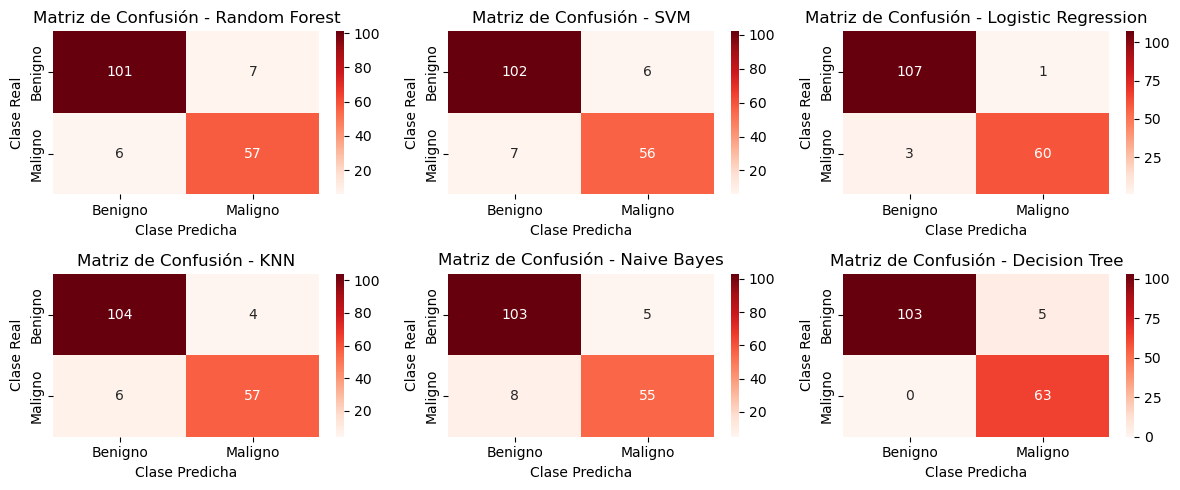

In [47]:
# Matrices de confusión
confusion_matrices = {}
for model_name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

# Etiquetas de las clases
class_labels = ['Benigno', 'Maligno']

# Configuración de la cuadrícula de subtramas
num_models = len(confusion_matrices)
fig, axes = plt.subplots(2, 3, figsize=(12,5))

# Mostrar las matrices de confusión
for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i // 3, i % 3]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_xlabel('Clase Predicha')
    ax.set_ylabel('Clase Real')
    ax.set_title(f'Matriz de Confusión - {model_name}')


plt.tight_layout()
plt.show()

In [48]:
from tabulate import tabulate

# Crear una lista de filas para la tabla
table_rows = []
for model_name, scores in metrics.items():
    row = [model_name]
    for metric, value in scores.items():
        row.append(value)
    table_rows.append(row)

# Definir los encabezados de la tabla
headers = ['Modelo'] + list(metrics[next(iter(metrics))].keys())

# Imprimir la tabla
print("Métricas de evaluación:")
print(" ")
print(tabulate(table_rows, headers=headers))

Métricas de evaluación:
 
Modelo                 Accuracy    Precision    Recall    F1-score
-------------------  ----------  -----------  --------  ----------
Random Forest          0.923977     0.890625  0.904762    0.897638
SVM                    0.923977     0.903226  0.888889    0.896
Logistic Regression    0.976608     0.983607  0.952381    0.967742
KNN                    0.94152      0.934426  0.904762    0.919355
Naive Bayes            0.923977     0.916667  0.873016    0.894309
Decision Tree          0.97076      0.926471  1           0.961832
